# Emotion Analysis of EEG Data

In [1]:
import numpy as np
import pandas as pd

from eeg import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="ticks")

## Load Data

In [4]:
data, emotion, sampling_rate = load_data("eeg_emotion.hdf5")

## Process Data

### Emotion 定类

In [5]:
labels_all = [None] * 6

In [6]:
# 四象限分类
labels_all[0] = np.zeros(emotion.shape[0], dtype=int)

labels_all[0][(emotion[:, 0] <  5) & (emotion[:, 1] <  5)] = 0
labels_all[0][(emotion[:, 0] >= 5) & (emotion[:, 1] <  5)] = 1
labels_all[0][(emotion[:, 0] <  5) & (emotion[:, 1] >= 5)] = 2
labels_all[0][(emotion[:, 0] >= 5) & (emotion[:, 1] >= 5)] = 3

<AxesSubplot:>

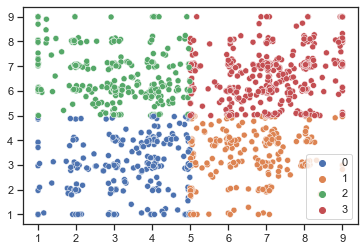

In [7]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels_all[0], palette="deep")

In [8]:
# 上下分类
labels_all[1] = np.zeros(emotion.shape[0], dtype=int)

labels_all[1][emotion[:, 0] <  5] = 0
labels_all[1][emotion[:, 0] >= 5] = 1

<AxesSubplot:>

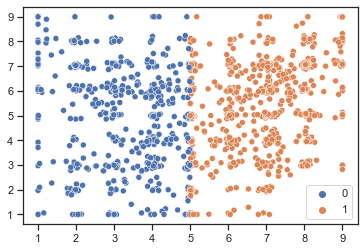

In [9]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels_all[1])

In [10]:
# 左右分类
labels_all[2] = np.zeros(emotion.shape[0], dtype=int)

labels_all[2][emotion[:, 1] <  5] = 0
labels_all[2][emotion[:, 1] >= 5] = 1

<AxesSubplot:>

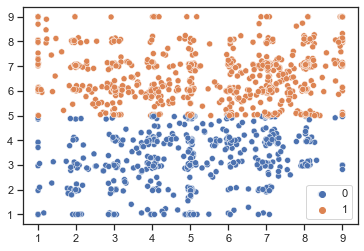

In [11]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels_all[2])

In [12]:
# 斜向分类
labels_all[3] = np.zeros(emotion.shape[0], dtype=int)

labels_all[3][emotion[:, 0] <= emotion[:, 1]] = 0
labels_all[3][emotion[:, 0] >  emotion[:, 1]] = 1

<AxesSubplot:>

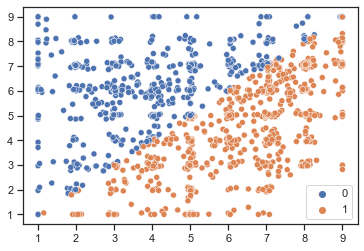

In [13]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels_all[3])

In [14]:
# 斜向分类
labels_all[4] = np.zeros(emotion.shape[0], dtype=int)

labels_all[4][(emotion[:, 0] > 5) & (emotion[:, 0] <= 7) & (emotion[:, 1] <= 3)] = 1

In [15]:
pd.DataFrame(
    labels_all[4],
    columns=['labels']
).to_excel("labels_2_sleep.xlsx")

<AxesSubplot:>

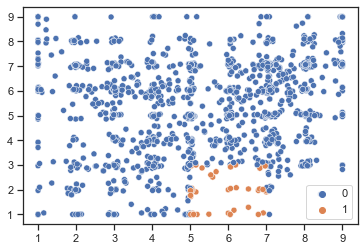

In [16]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels_all[4])

In [17]:
pd.DataFrame(
    labels_all[4],
    columns=['labels']
).value_counts()

labels
0         1224
1           56
dtype: int64

#### 选取分类

In [18]:
labels = labels_all[3]

### PSD特征

计算频带功率谱密度PSD特征

- signal:输入信号
- N:采样点数

输出: PSD \[theta, alpha, beta, gamma\]

计算 4-45Hz 四个频带 theta, alpha, beta, gamma 的 PSD

Reference: [brain-waves](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/brain-waves)

- **直接法**: $P(k)=\frac{1}{N}|x(k)|^2$
- **Welch方法**: 常用方法

#### Periodogram Method

In [37]:
eeg0 = EEG(
    data=data,
    labels=labels,
    psd_opt={
        'name': 'periodogram',
        'fs': sampling_rate,
        'nfft': 256,
    }
)

index_new[1].start=1
index_new[1].stop=10
index_new[1].step=None
index_new[1].start=9
index_new[1].stop=18
index_new[1].step=None
index_new[1].start=17
index_new[1].stop=27
index_new[1].step=None
index_new[1].start=26
index_new[1].stop=76
index_new[1].step=None
index_new[1].start=75
index_new[1].stop=97
index_new[1].step=None


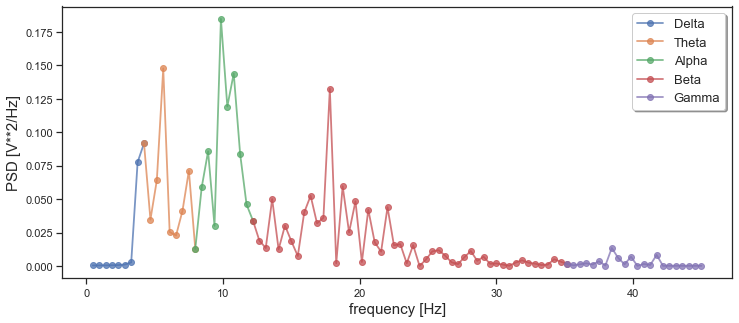

<Figure size 432x288 with 0 Axes>

In [39]:
eeg0.show_psd(k=0, title=None)

#### Welch Method

In [104]:
eeg1 = EEG(
    data=data,
    labels=labels,
    psd_opt={
        'name': 'welch',
        'fs': sampling_rate,
        'nfft': 128,
        'nperseg': 128,
        'window': 'hamming',
    }
)

In [105]:
eeg1.psd.f

array([ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
        6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
       13.125 , 14.0625, 15.    , 15.9375, 16.875 , 17.8125, 18.75  ,
       19.6875, 20.625 , 21.5625, 22.5   , 23.4375, 24.375 , 25.3125,
       26.25  , 27.1875, 28.125 , 29.0625, 30.    , 30.9375, 31.875 ,
       32.8125, 33.75  , 34.6875, 35.625 , 36.5625, 37.5   , 38.4375,
       39.375 , 40.3125, 41.25  , 42.1875, 43.125 , 44.0625, 45.    ,
       45.9375, 46.875 , 47.8125, 48.75  , 49.6875, 50.625 , 51.5625,
       52.5   , 53.4375, 54.375 , 55.3125, 56.25  , 57.1875, 58.125 ,
       59.0625, 60.    ])

In [119]:
start = 0.5
index0 = (eeg1.psd.f + (eeg1.psd.f[1] - eeg1.psd.f[1]) > start).argmin()
index1 = (eeg1.psd.f < start).argmin()
eeg1.psd.f[index1] - start
print(f"{index0=}, {index1=}")
print()

index0=0, index1=1



In [106]:
eeg1.psd.psd

array([[4.52667973e-04, 3.58008519e-04, 1.79662375e-05, ...,
        1.21720955e-06, 1.21149135e-06, 6.04783237e-07],
       [4.16444647e-04, 3.14700029e-04, 1.73880240e-05, ...,
        9.60465012e-07, 9.56681826e-07, 4.77648627e-07],
       [5.17192073e-04, 3.90547965e-04, 1.53791710e-05, ...,
        8.06754467e-07, 8.03582076e-07, 4.01297157e-07],
       ...,
       [9.38173563e-04, 6.75685982e-04, 2.70152386e-05, ...,
        8.81017605e-07, 8.78420934e-07, 4.38730150e-07],
       [7.45827648e-04, 5.37633454e-04, 1.73923326e-05, ...,
        1.53525889e-06, 1.52977739e-06, 7.63990586e-07],
       [1.09065713e-03, 7.93388845e-04, 2.45554331e-05, ...,
        1.06130606e-06, 1.05743624e-06, 5.27995533e-07]])

index_new[1].start=1
index_new[1].stop=10
index_new[1].step=None
index_new[1].start=9
index_new[1].stop=18
index_new[1].step=None
index_new[1].start=17
index_new[1].stop=27
index_new[1].step=None
index_new[1].start=26
index_new[1].stop=76
index_new[1].step=None
index_new[1].start=75
index_new[1].stop=97
index_new[1].step=None


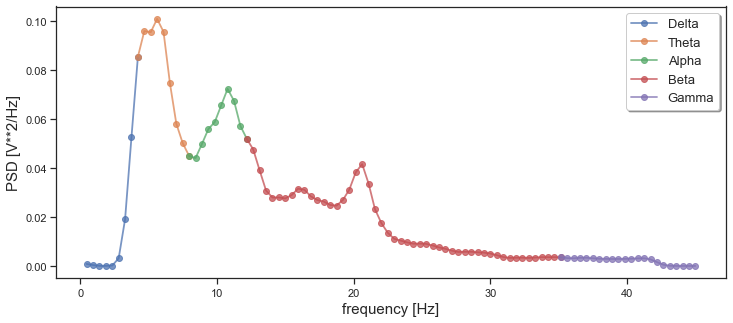

<Figure size 432x288 with 0 Axes>

In [41]:
eeg1.show_psd(k=0, title=None)

#### 选取模型

In [75]:
# 选择模型
eeg = eeg0

<AxesSubplot:>

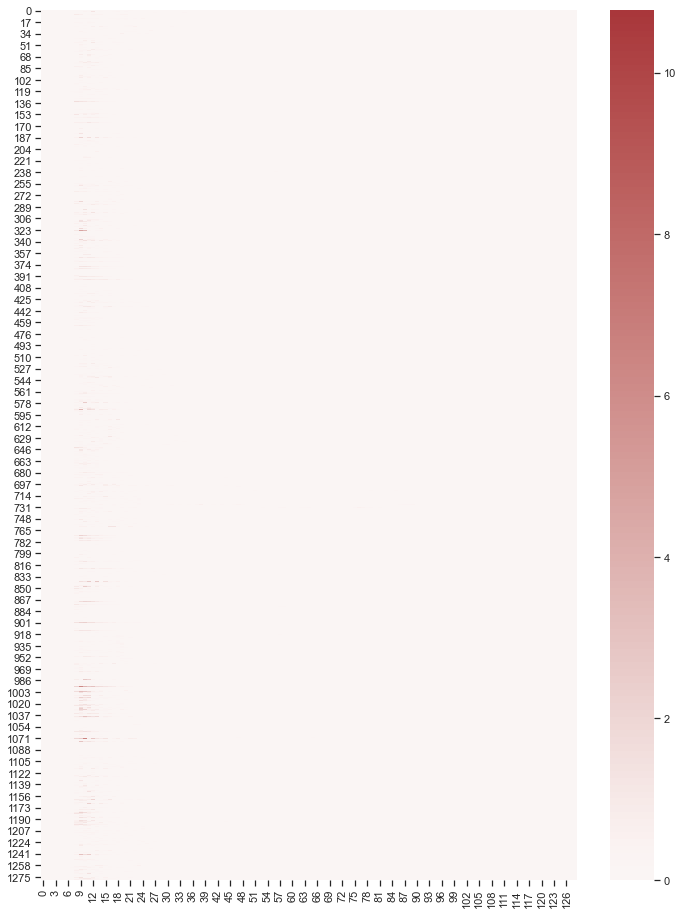

In [76]:
fig, ax = plt.subplots(figsize=(12, 16))
sns.heatmap(eeg.psd.psd[0:, :], center=0, cmap='vlag')

### 提取特征

In [25]:
df_dict = dict()

#### 直接数据

In [77]:
# 直接数据
features, labels = eeg.to_pandas()

df_dict.update({
    "origin": {
        "features": features,
        "labels": labels
    }
})

index_new[1].start=1
index_new[1].stop=9
index_new[1].step=None
index_new[1].start=9
index_new[1].stop=17
index_new[1].step=None
index_new[1].start=17
index_new[1].stop=26
index_new[1].step=None
index_new[1].start=26
index_new[1].stop=75
index_new[1].step=None
index_new[1].start=75
index_new[1].stop=96
index_new[1].step=None


In [78]:
features.describe()

,Delta,Theta,Alpha,Beta,Gamma
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,0.191179,1.295424,0.398323,0.489507,0.082822
std,0.312070,1.867207,0.353541,0.391890,0.137288
min,0.000681,0.022063,0.004666,0.009807,0.001223
25%,0.027485,0.337221,0.167575,0.235952,0.023494
50%,0.079485,0.739964,0.302083,0.411010,0.048534
75%,0.208701,1.472235,0.528038,0.655103,0.101168
max,3.388743,25.948457,3.422459,6.040002,2.910079


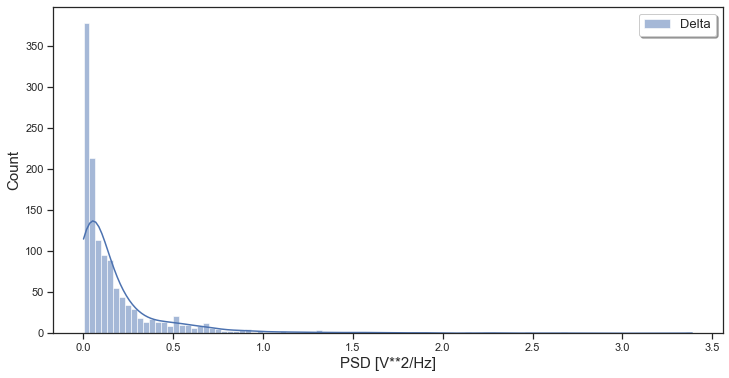

<Figure size 432x288 with 0 Axes>

In [79]:
eeg.show_histplot_one(0, log=False, title=None)

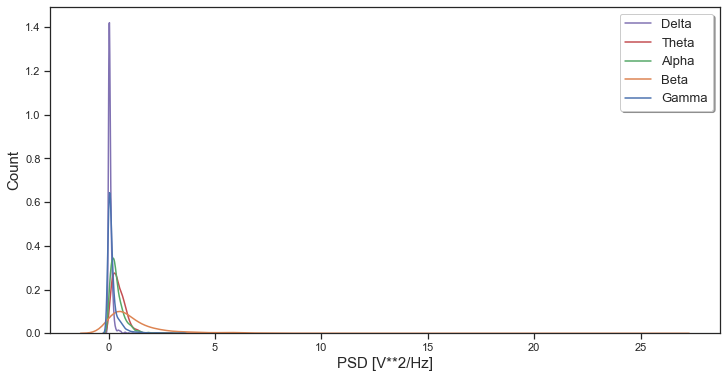

<Figure size 432x288 with 0 Axes>

In [80]:
eeg.show_kdeplot_all(log=False, title=None)

#### 对数处理

In [81]:
# 对数处理
features_log, labels = eeg.to_pandas(log_scale=True)

df_dict.update({
    "log": {
        "features": features_log,
        "labels": labels
    }
})

In [82]:
features_log.describe()

,Delta,Theta,Alpha,Beta,Gamma
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,-1.126817,-0.149740,-0.559363,-0.426361,-1.322143
std,0.639157,0.483505,0.404583,0.338124,0.452885
min,-3.166680,-1.656330,-2.331098,-2.008448,-2.912410
25%,-1.560904,-0.472086,-0.775793,-0.627176,-1.629053
50%,-1.099716,-0.130789,-0.519874,-0.386148,-1.313956
75%,-0.680475,0.167976,-0.277337,-0.183692,-0.994960
max,0.530039,1.414112,0.534338,0.781037,0.463905


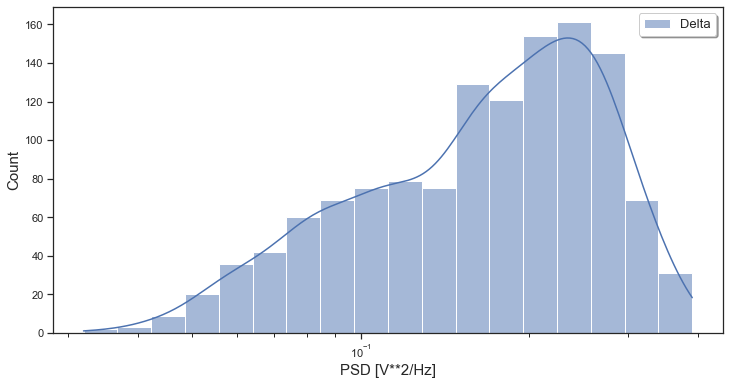

<Figure size 432x288 with 0 Axes>

In [50]:
eeg.show_histplot_one(0, log=True, title=None)

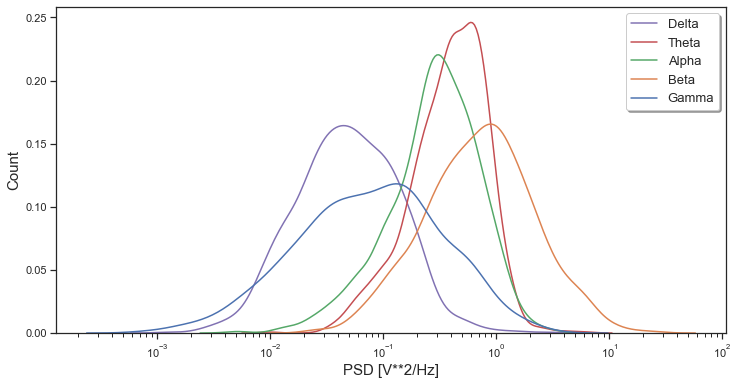

<Figure size 432x288 with 0 Axes>

In [83]:
eeg.show_kdeplot_all(log=True, title=None)

## Analysis Data

### 直接数据

In [84]:
df = features.copy()
df['label'] = labels.copy()

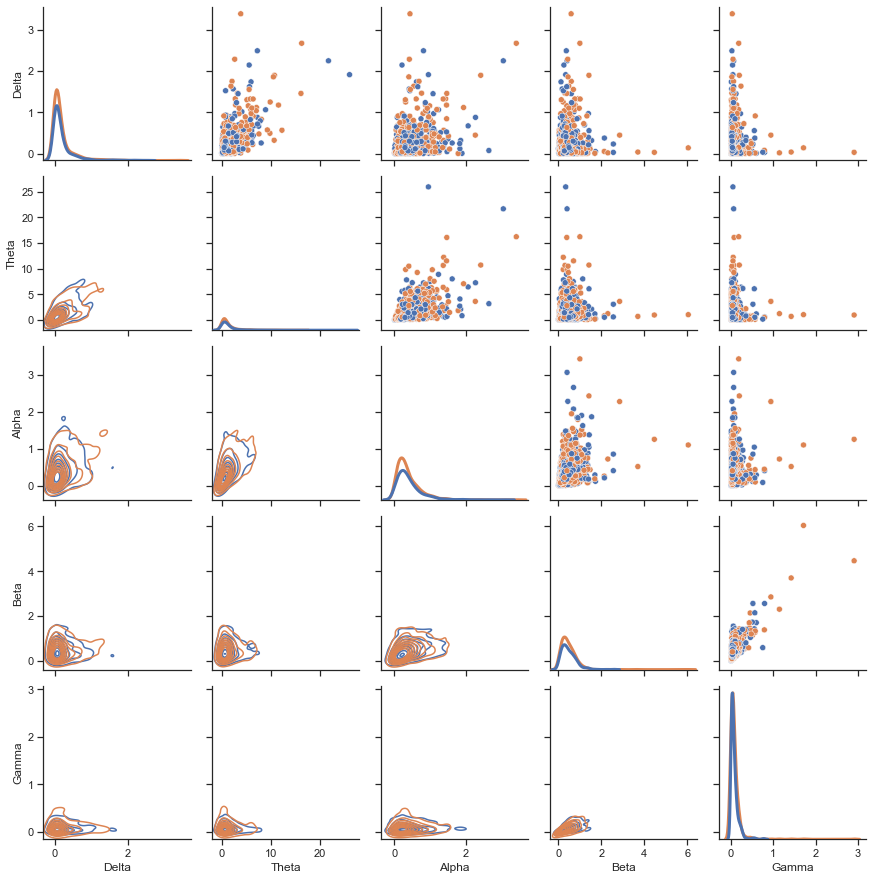

In [85]:
g = sns.PairGrid(df, hue="label")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<AxesSubplot:>

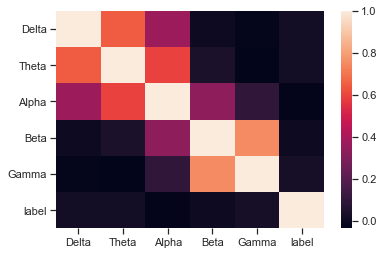

In [86]:
sns.heatmap(df.corr())

### Log化数据

In [87]:
df_log = features_log.copy()
df_log['label'] = labels.copy()

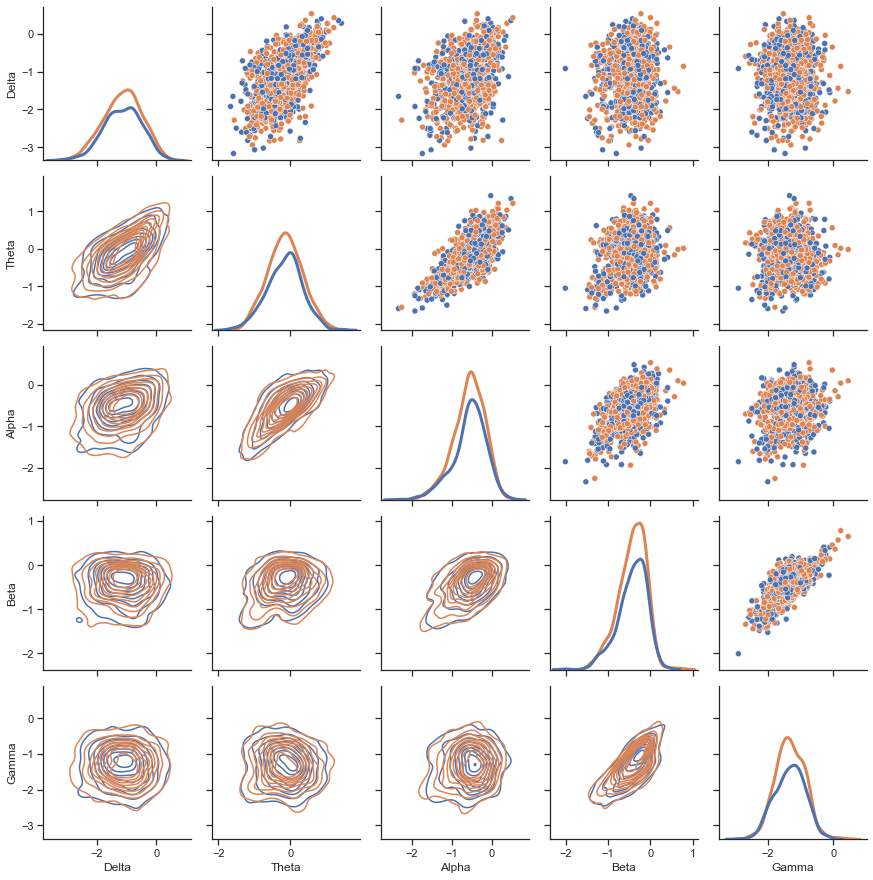

In [88]:
g = sns.PairGrid(df_log, hue="label")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<AxesSubplot:>

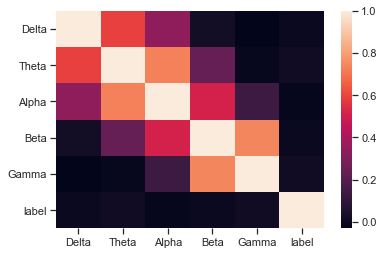

In [89]:
sns.heatmap(df_log.corr())

### 标准化数据

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
features_log_stand = scaler.fit_transform(df_log[df_log.columns.difference(['label'])])

In [62]:
df_log_stand = pd.DataFrame(
    features_log_stand,
    columns=features.columns
)
df_log_stand['label'] = labels

In [63]:
df_log_stand.describe()

,Delta,Theta,Alpha,Beta,Gamma,label
count,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1280.000000
mean,4.940492e-16,3.885781e-17,-1.054712e-16,2.053913e-16,-1.526557e-17,0.567187
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,0.495659
min,-2.537533e+00,-3.152659e+00,-3.230547e+00,-2.741250e+00,-3.885871e+00,0.000000
25%,-6.641954e-01,-6.888528e-01,-7.123473e-01,-7.179781e-01,-6.604514e-01,0.000000
50%,-1.220809e-02,2.743930e-01,1.788446e-01,2.299851e-02,1.760847e-01,1.000000
75%,6.876273e-01,7.514334e-01,8.154901e-01,7.541112e-01,8.040846e-01,1.000000
max,2.584651e+00,1.721214e+00,1.761082e+00,2.198825e+00,1.645059e+00,1.000000


<AxesSubplot:>

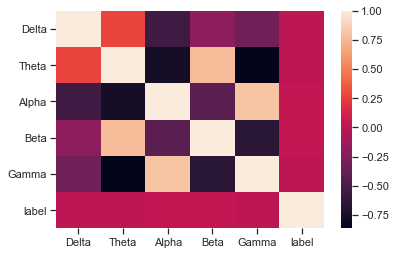

In [64]:
sns.heatmap(df_log_stand.corr())

### 主成分分析 PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=3)
pca.fit(features_log)

In [41]:
pca.explained_variance_ratio_

array([0.71611788, 0.2195848 , 0.03187101])

In [43]:
df_log_pca = pd.DataFrame(
    pca.transform(features_log),
    columns=['PCA 1', 'PCA 2', 'PCA 3']
)
df_log_pca['label'] = labels

<AxesSubplot:>

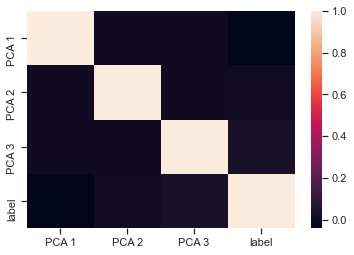

In [45]:
sns.heatmap(df_log_pca.corr())

## Classify

### Support Vector Machine

In [90]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(
    features_log, labels, test_size=0.2, shuffle=True
)

In [100]:
clf = svm.SVC(
    kernel='sigmoid',
    decision_function_shape='ovo'
)

In [101]:
clf.fit(
    x_train,
    y_train
)

y_pred = clf.predict(x_test)

In [102]:
f"{np.sum(y_pred == y_test) / y_test.size:.2%}"

'47.66%'

### FNN

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as Fun

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 8)
        self.hidden2 = torch.nn.Linear(8, 8)
        self.hidden3 = torch.nn.Linear(8, 6)
        self.out = torch.nn.Linear(6, n_output)
        
    def forward(self, x):
        x = Fun.relu(self.hidden1(x))
        x = Fun.relu(self.hidden2(x))
        x = Fun.relu(self.hidden3(x))
        x = self.out(x)
        return x

In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=0, shuffle=True
)

In [88]:
features_nn = torch.FloatTensor(x_train.to_numpy())
label_nn = torch.LongTensor(y_train.to_numpy())

In [89]:
net = Net(5, 2)
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

In [90]:
for i in range(1000):
    out = net(features_nn)
    loss = loss_func(out, label_nn)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [91]:
out = net(torch.FloatTensor(x_test.to_numpy()))
prediction = out.argmax(dim=1)
pred_y = prediction.numpy()

In [92]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
y_test.to_numpy()

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [94]:
f"{np.sum(pred_y == y_test) / y_test.size:.2%}"

'56.25%'